> <h2>Diabetes Dataset</h2>
<hr>


- **1. Age**
> *The Age of the Patient.     
> Higher value means older patient.      
> Age is important beacause diabetes risk increases with age.*


- **2. Sex**
> *Gender of the Patient.    
> Encoded as Noramlized values (0-1).*


- **3. BMI**
> *Body Mass Index.   
> Highr bmi, Higher diabetes risk.*


- **4. BP**
> *Average Blood pressure.          
> High blood pressure, Higher risk of complications.*


- **5. s1**
> *TC, Total Cholesterol.     
> Measures total fat in blood.     
> High cholesterol increases diabetes complications.*


- **6. s2**
> *LDL Cholesterol (bad cholesterol).       
> Higher LDL, Higher risk.*


- **7. s3**
> *HDL Cholesterol (good cholesterol).   
> Opposite relationship:   
            - Higher HDL Better health  Lower risk.*
            


- **8. s4**
> *TCH / LDL Ratio.          
>Ratio of total cholesterol to LDL.         
>Helps understand fat distribution in blood.*


- **9. s5**
> *Blood Glucose Level.       
> Most important feature.      
> High glucose = High diabetes progression.*    


- **10. s6**
> *Blood Serum Measurement (another cholesterol-related value).         
> Helps understand liver and blood condition.*


- **11. Target**  
> *Disease progression score after 1 year.          
> Higher value means the patient’s condition worsened more.      
> This is what your model predicts.*

| Column     | Meaning                           |
| ---------- | --------------------------------- |
| **age**    | Age of patient                    |
| **sex**    | Gender (encoded)                  |
| **bmi**    | Body Mass Index                   |
| **bp**     | Average Blood Pressure            |
| **s1**     | Total Cholesterol (TC)            |
| **s2**     | LDL Cholesterol (bad fat)         |
| **s3**     | HDL Cholesterol (good fat)        |
| **s4**     | Cholesterol ratio (TC/LDL)        |
| **s5**     | Blood glucose level               |
| **s6**     | Blood serum measurement           |
| **Target** | Diabetes progression after 1 year |


> **Libraries**

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


> **Load the data from sklearn**

In [272]:
data = load_diabetes() # load the data and store the (data) variable
df= pd.DataFrame(data.data, columns=data.feature_names) # data convert to dataFrame
df['Target'] = data.target # dependent column (Target)
df.head() # display top 5 Rows

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


> **Check the Data shape**

In [273]:
df.shape # total rows 442(Four Hundred Fourty Two), & columns 11(Eleven)

(442, 11)

> **Data Summary**

In [274]:
df.info() # info() function shows data summary (total rows and columns in dataset, Datatypes of features etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


> **Statistical Summmary of Data**

In [275]:
df.describe() 
# describe() function shows statistical summary of dataset (count, mean value of each columns, standard daviation etc.)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


- **Check Null values in Data**

In [276]:
df.isnull().sum() # isnull() function shows the null values in dataset (return sum)
# df.isnull().mean()   retuen Mean values
# df.isnull().any()    return False

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64

In [277]:
df.duplicated().sum() # duplicated() function shows duplicated values in dataset (0 mean not duplicated values in data)

0

> **Exploratory data analysis**

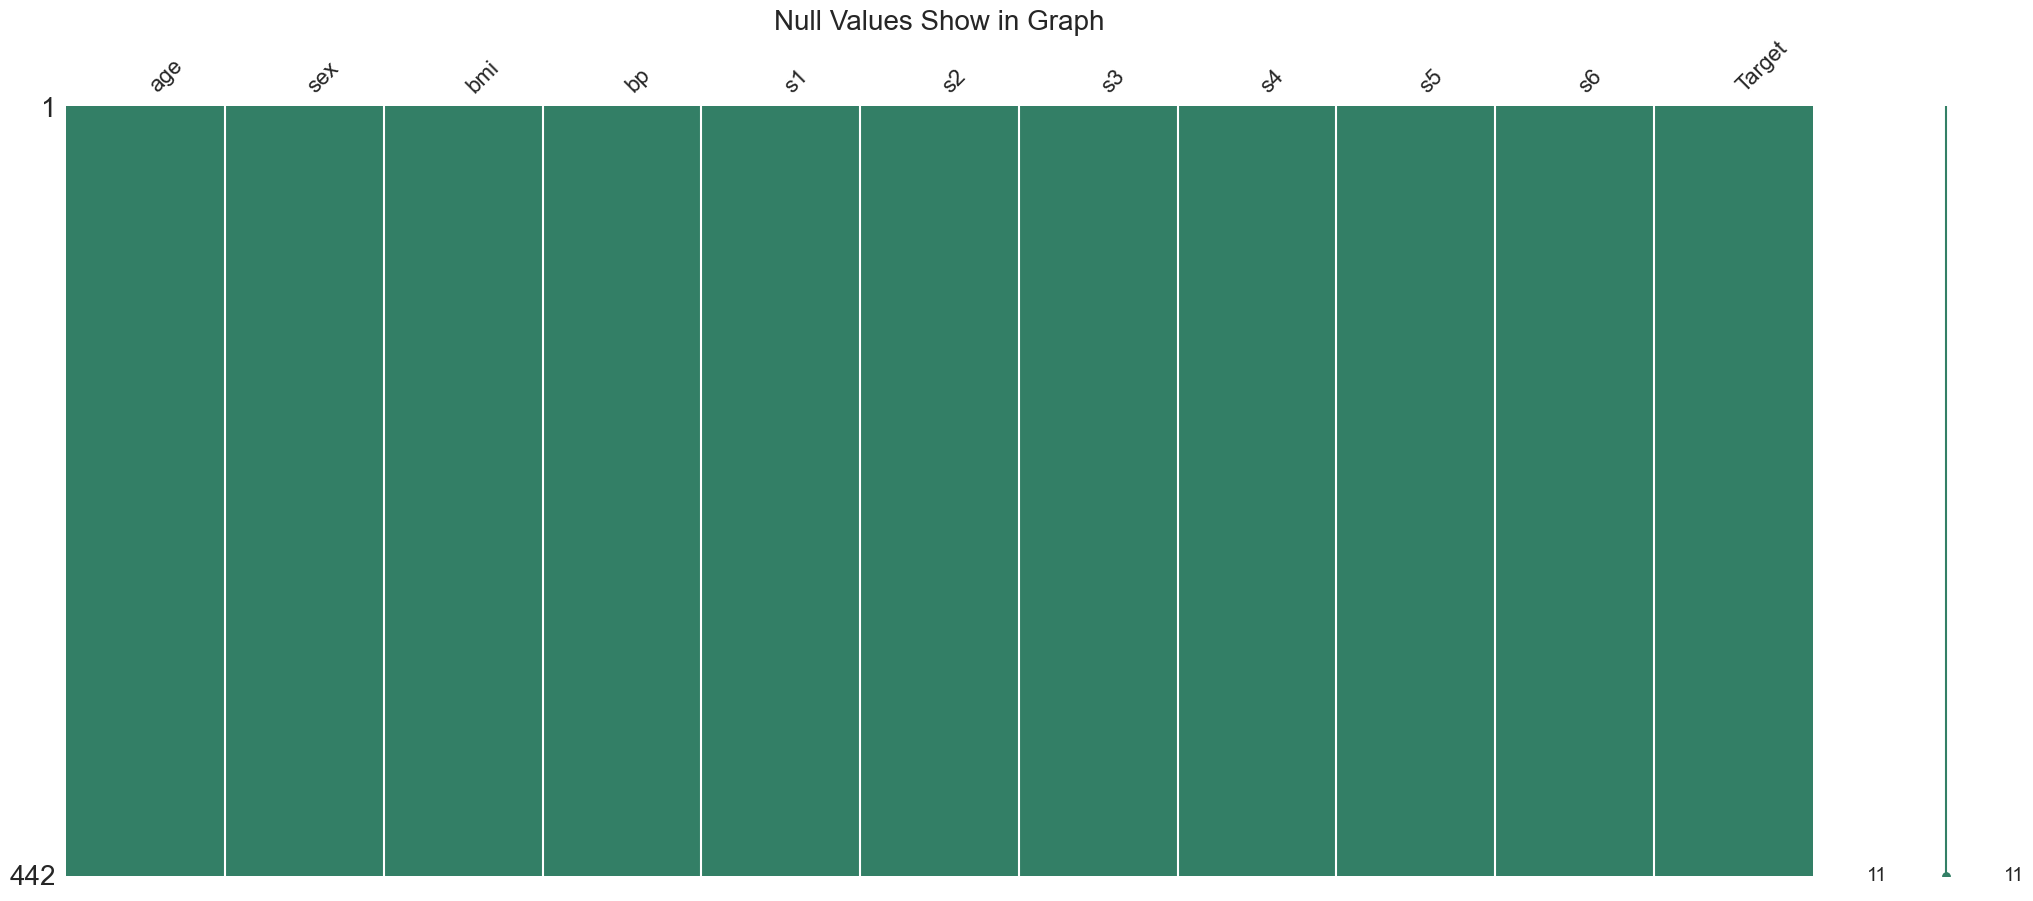

In [278]:
msno.matrix(df, color=(0.2,0.5,0.4)) # Missing values show in Graph (in this case no missing values in dataset)
plt.title('Null Values Show in Graph', fontsize=20)
plt.show()

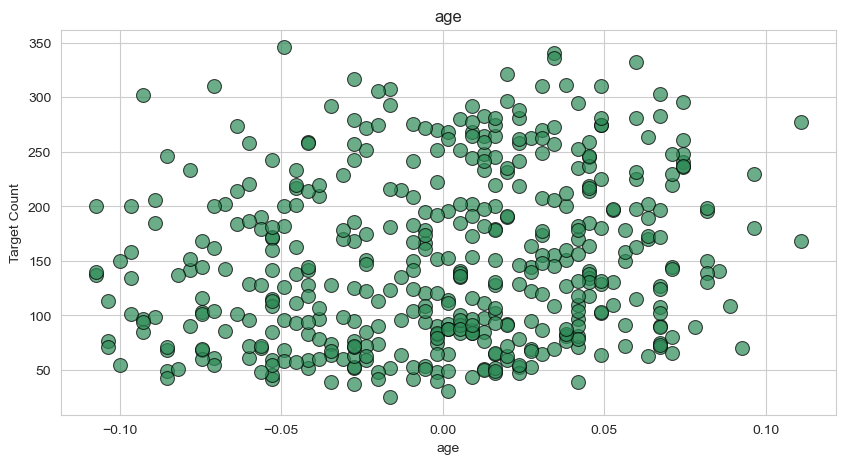

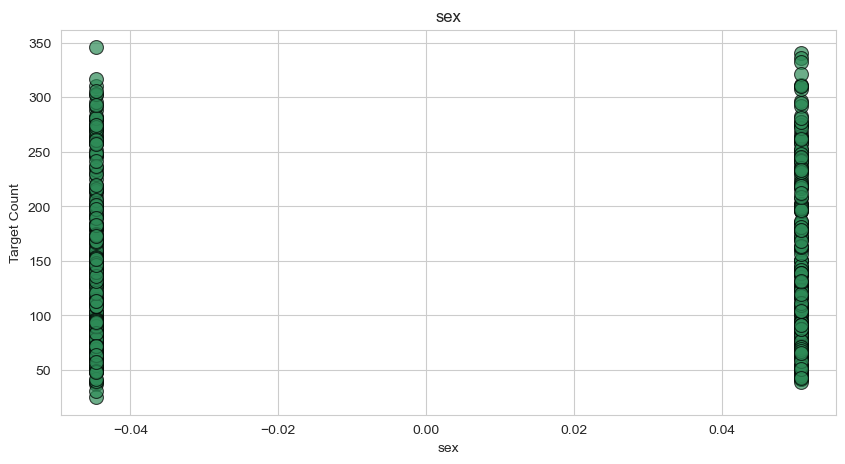

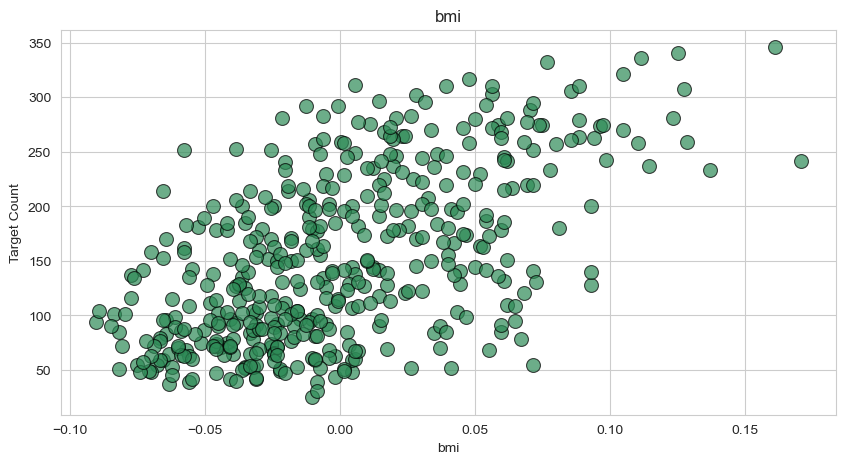

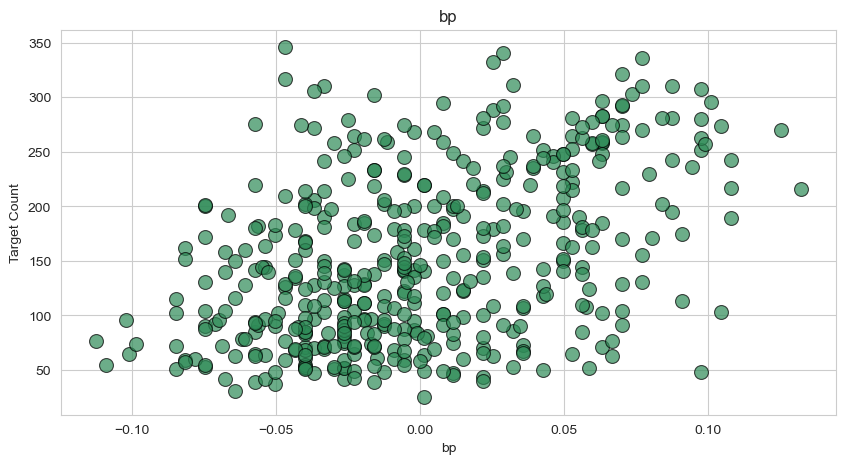

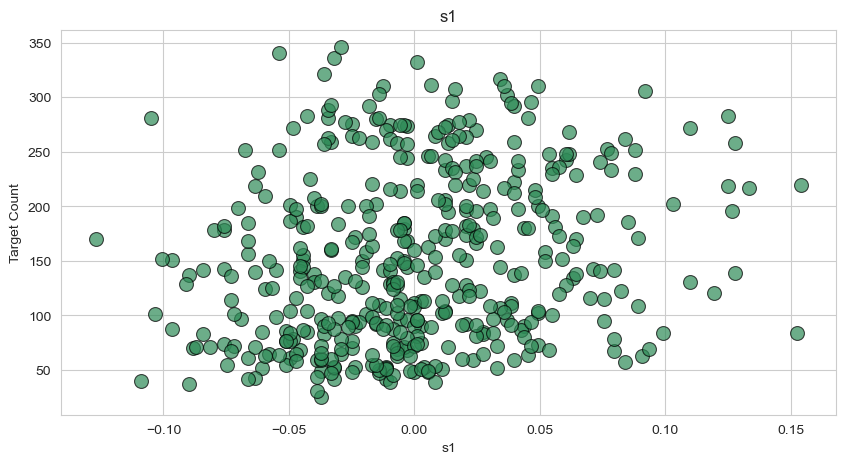

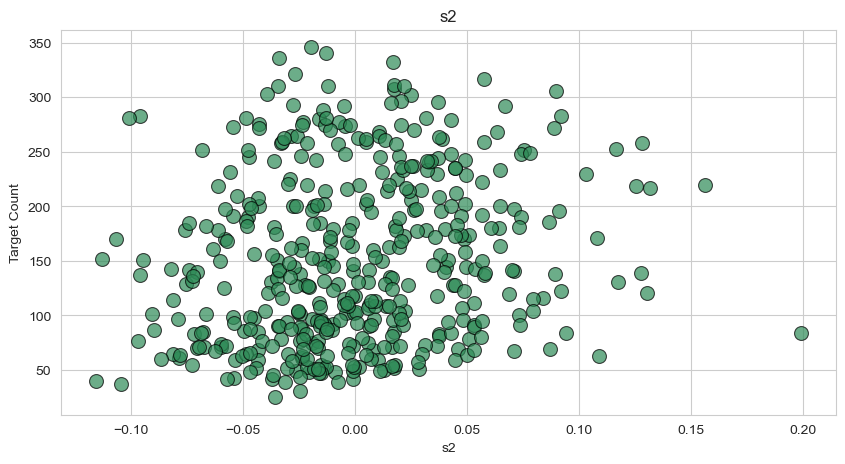

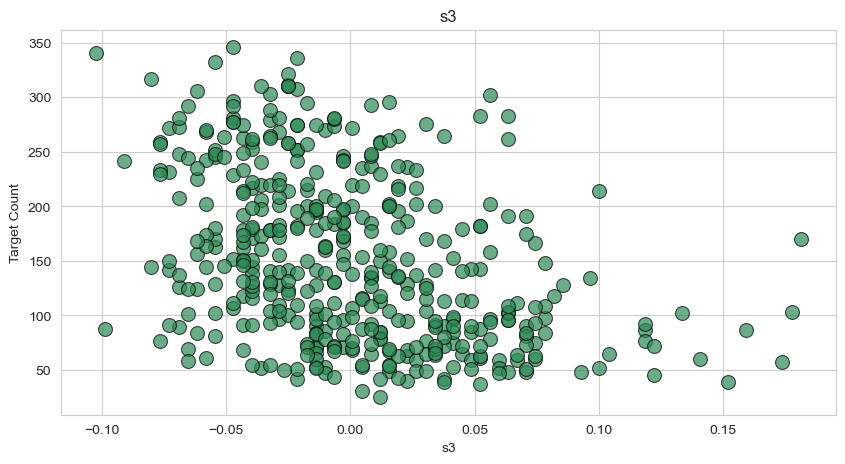

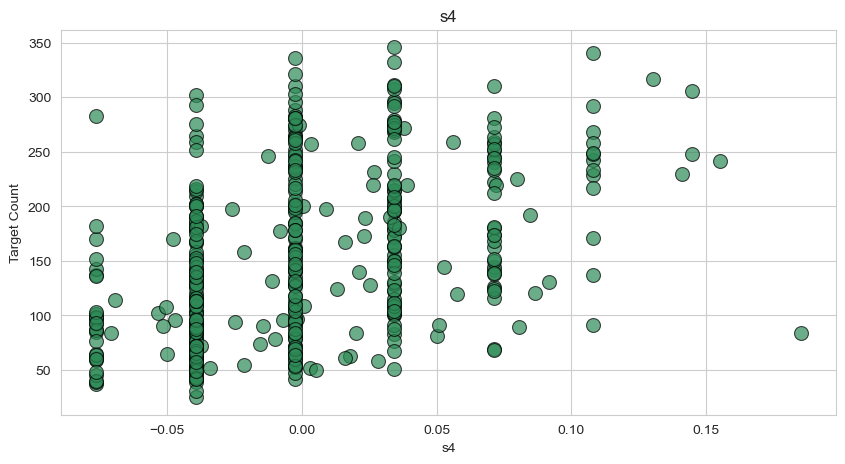

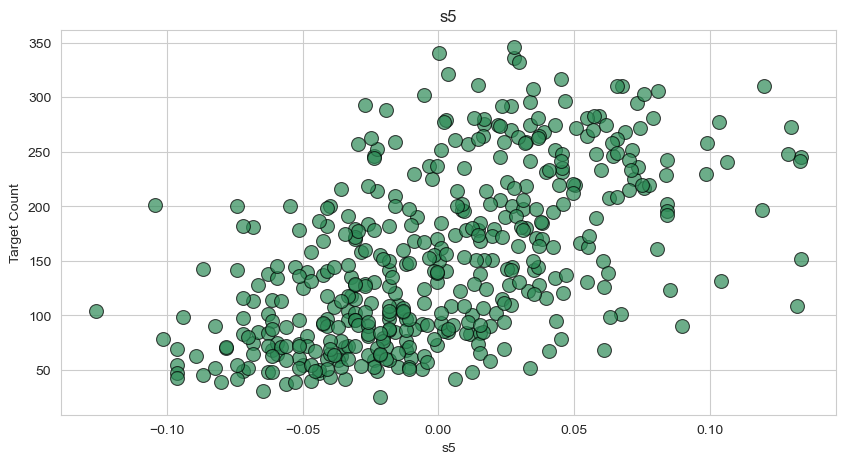

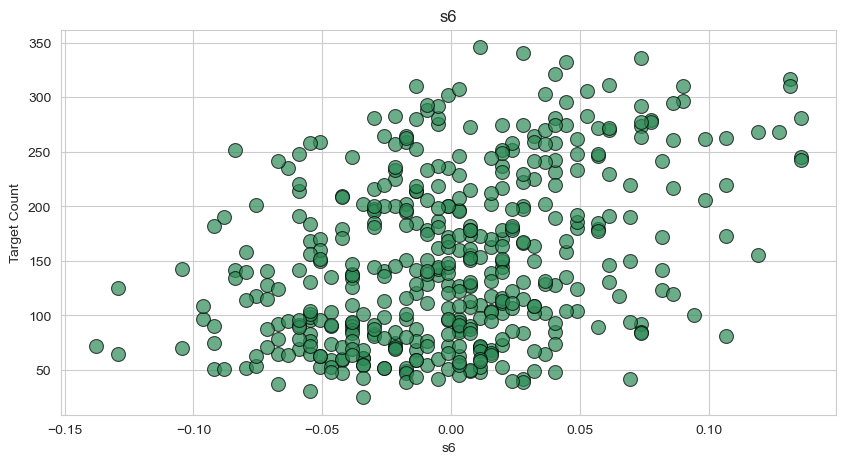

In [279]:
sns.set_style('whitegrid') 
for label in df.columns[0:-1]:# scatterplot of all features with Target col (Check correlation Independent and dependent features)
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df[label], y = df['Target'], alpha=0.7, s=100, color='seagreen', edgecolor='black')
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Target Count')
    plt.show()
    

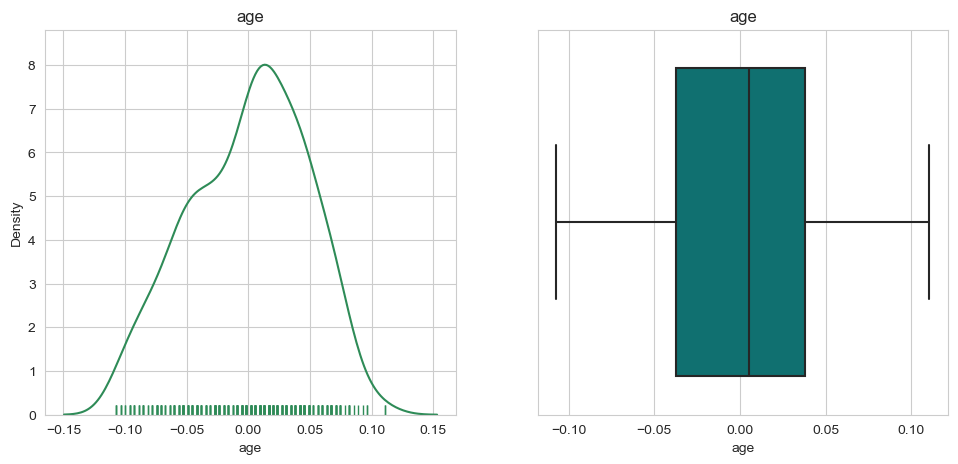

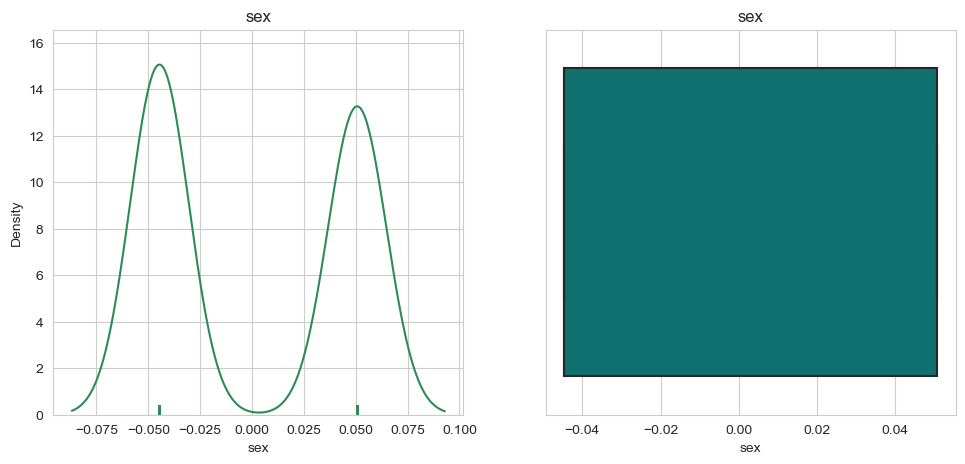

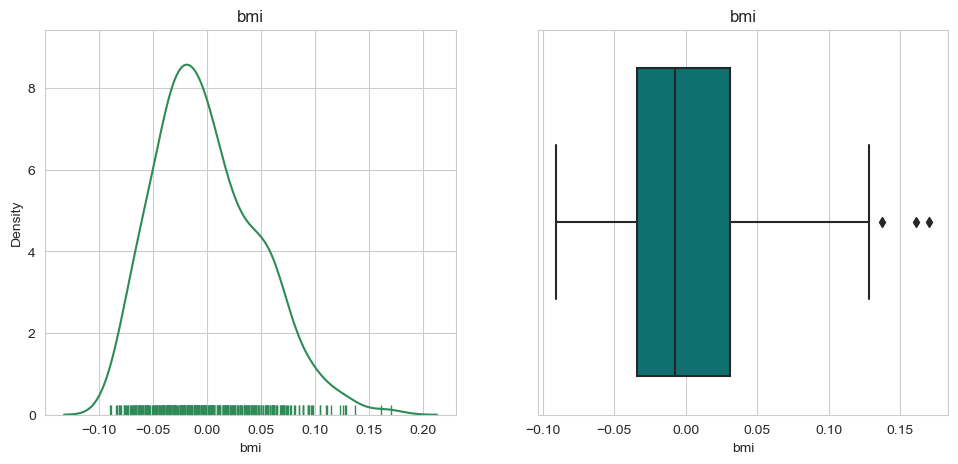

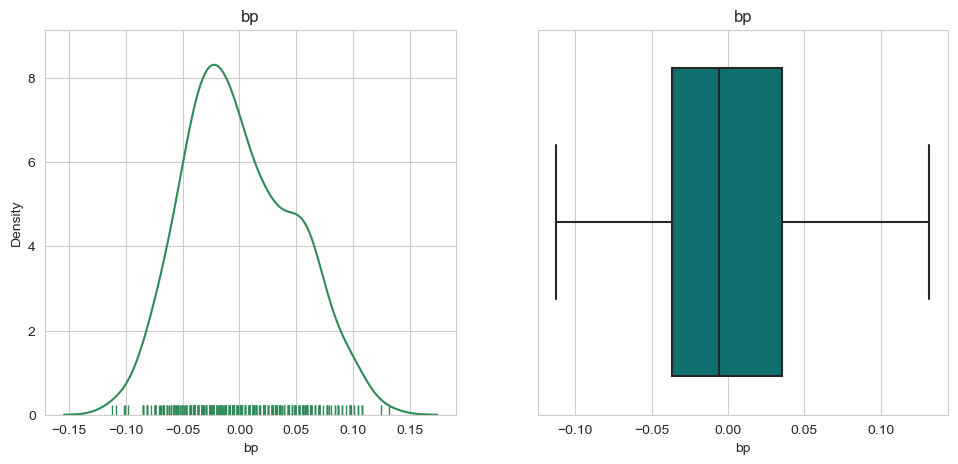

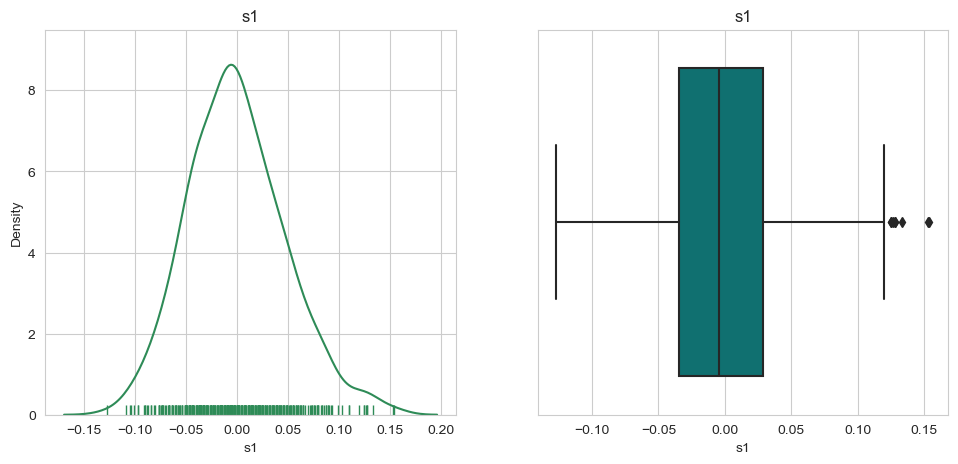

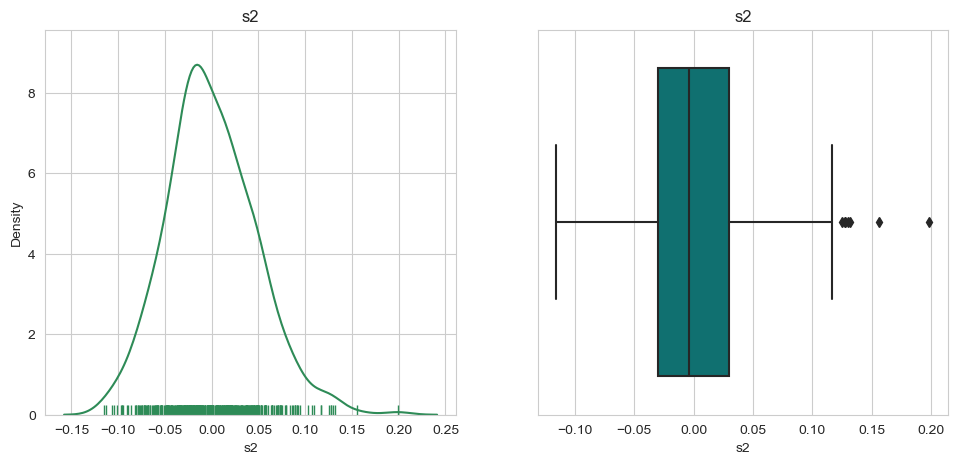

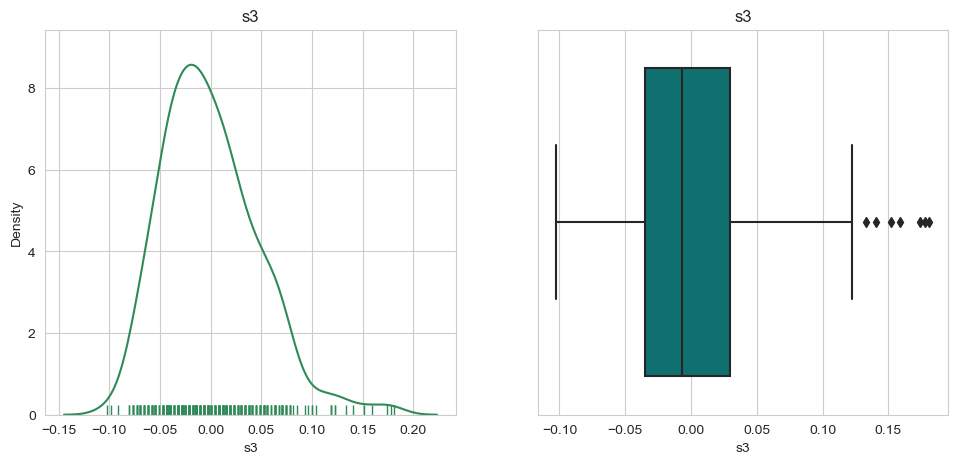

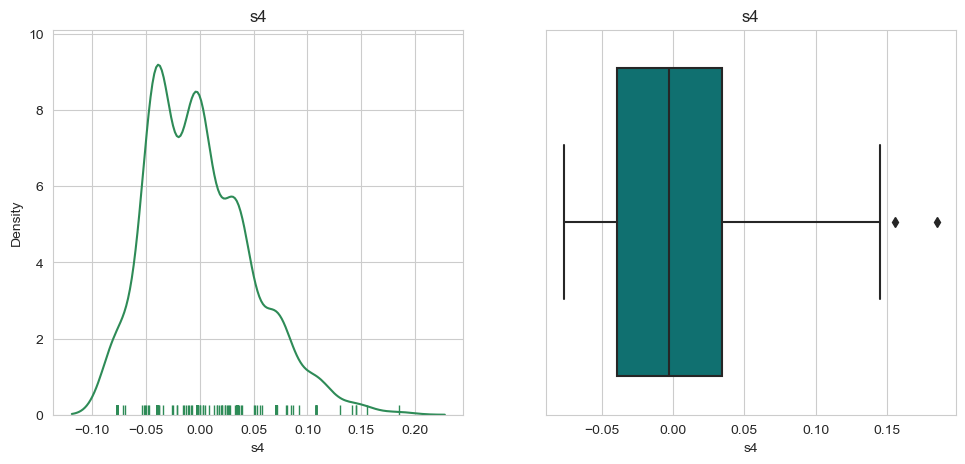

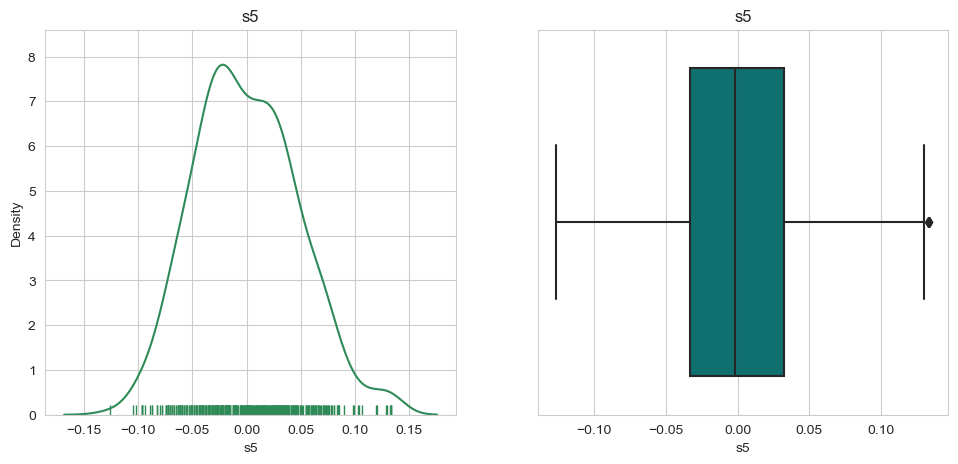

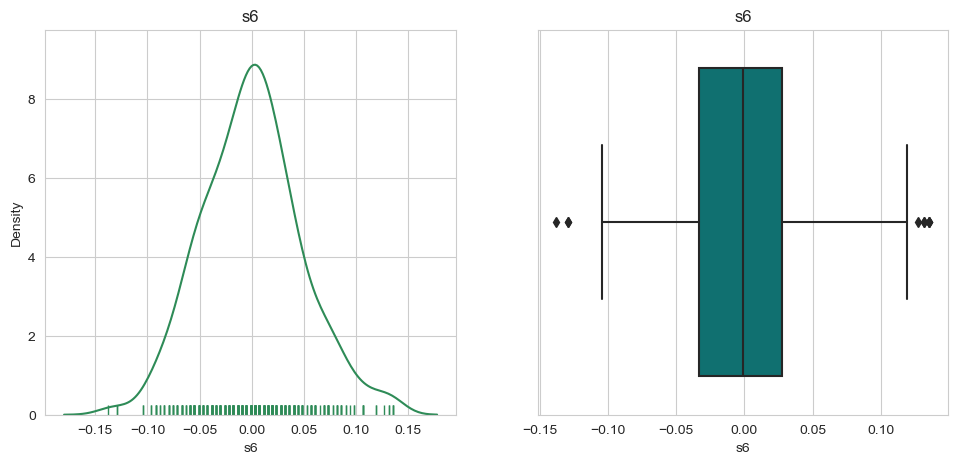

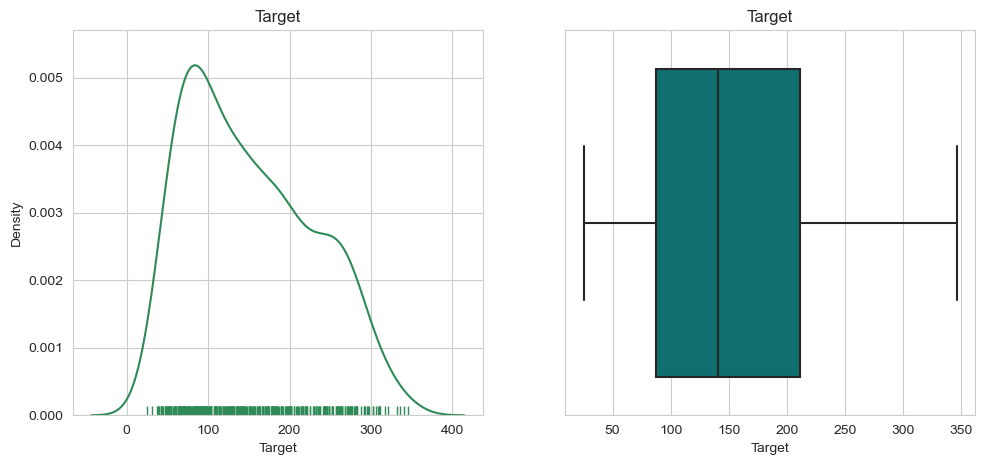

In [280]:
for cols in df.columns:
    plt.figure(figsize=(18,5))
    
    plt.subplot(1,3,1)
    sns.distplot(df[cols], hist=False, color='seagreen', rug=True)
    plt.title(cols)
    plt.xlabel(cols)
    
    plt.subplot(1,3,2)
    sns.boxplot(x = df[cols], color='teal')
    plt.title(cols)
    plt.xlabel(cols)
    plt.show()

In [285]:
X = df.drop('Target',axis=1) # split X and y 
y =df['Target']

# split data into training and testing sets 
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)
y_test.shape

(89,)

In [286]:
lr = LinearRegression() # object of LR
lr.fit(X_train,y_train) # train the data

y_hat = lr.predict(X_test) # prediction

In [287]:
print("MAE:", mean_absolute_error(y_test,y_hat)) # Mean absolute error (total error) |yactual-yhat|/yactual_mean

print("MSE:", mean_squared_error(y_test,y_hat)) # Mean Squared error (squared error) (yactual-yhat)2/yactual_mean

print("RMSE:", np.sqrt(mean_squared_error(y_test,y_hat))) # Root Mean squared error (square root) sqrt((yactual-yhat)2/yactual_mean)

print("R2 Score:", r2_score(y_test,y_hat)) 
# SSR/SSM 
# Sum of squared Regression line
# Sum of squared mean line

# Formula of R2 Score
#   (yactual-yhat)2     Regression line
# --------------------------------
#   (yactual-ymean)2    Mean line

r2 = r2_score(y_test,y_hat)

MAE: 45.213034190469024
MSE: 3094.4566715660626
RMSE: 55.627840795469155
R2 Score: 0.4399338661568968


In [289]:
1-((1-r2)*(89-1) / (89-1-10))  #   Adjusted R2 Score

#   (1-R2_score) * (1 - n)        n means total values(rows)
# --------------------------------
#   (1 - n - p(k))                n= total values, p(k)=total features (independent features)

0.3681305156641912

In [295]:
lr.coef_ # betas

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [296]:
lr.intercept_ # intercept

151.88331005254167

In [294]:
y_test[:4]

212     73.0
422    233.0
67      97.0
89     111.0
Name: Target, dtype: float64

In [292]:
y_hat[:4]

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893])